<a href="https://colab.research.google.com/github/ashuGulati/fastai/blob/master/fastai_lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + "fastai-v3/"

Mounted at /content/gdrive


To download images from google directly paste this in Console-


urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [0]:
from fastai.vision import *

In [0]:
from fastai.metrics import error_rate

In [0]:
folder = 'dal'
file = 'dal.csv'


In [0]:
folder = 'gulab'
file = 'gulab.csv'


In [0]:
folder = 'puri'
file = 'puri.csv'


In [0]:
folder = 'roti'
file = 'roti.csv'

In [0]:
path = Path(base_dir + 'data/food')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/food/roti'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/food/puri'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/food/gulab'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/food/dal')]

In [0]:
classes = ['dal', 'gulab', 'puri', 'roti']

In [0]:
download_images(path/file, path/folder, max_pics=100)

In [0]:
classes

['roti', 'puri', 'gulab', 'dal']

In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete = True, max_size=500)

dal


gulab


puri


roti


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['dal', 'gulab', 'puri', 'roti']

In [0]:
data.show_batch(rows=3, figsize=(12,6))

In [0]:
len(data.train_ds)

272

In [0]:
len(data.valid_ds)

68

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.280252,1.315627,0.529412,00:02
1,1.634106,0.639671,0.176471,00:02
2,1.201894,0.633383,0.161765,00:02
3,0.927694,0.621177,0.205882,00:02
4,0.733944,0.632107,0.205882,00:02
5,0.609960,0.632292,0.205882,00:02
6,0.503231,0.642034,0.191176,00:02
7,0.424175,0.645953,0.176471,00:02
8,0.363046,0.649235,0.176471,00:02
9,0.318012,0.644522,0.176471,00:02


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.load('stage-1')

In [0]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


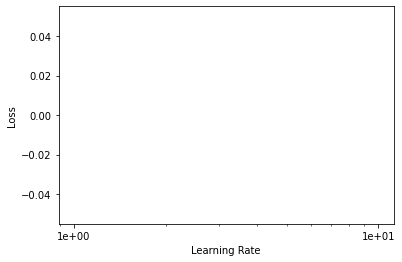

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(6, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.044991,0.626602,0.176471,00:03
1,0.026289,0.536000,0.161765,00:03
2,0.018968,0.565392,0.147059,00:03
3,0.017347,0.660524,0.161765,00:03
4,0.017568,0.676501,0.147059,00:02
5,0.016492,0.672860,0.147059,00:03


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

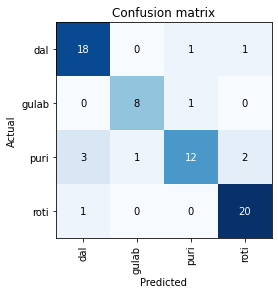

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.plot_top_losses(6, figsize=(12,6))

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, size=224).normalize(imagenet_stats)

In [0]:
learn_cln = cnn_learner(data, models.resnet34, metrics=error_rate)
learn_cln.load('stage-2')

In [0]:
learn_cln.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.142989,0.178891,0.017544,00:02
1,0.085627,0.152251,0.017544,00:02
2,0.062183,0.141138,0.017544,00:02
3,0.052625,0.136693,0.017544,00:02


In [0]:
interp = ClassificationInterpretation.from_learner(learn_cln)

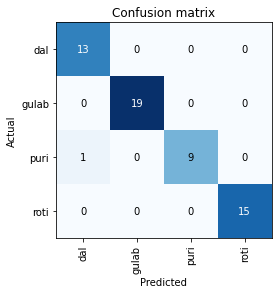

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn_cln.export()

In [0]:
defaults.device = torch.device('cpu')

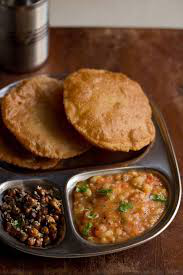

In [0]:
img = open_image(path/'test1.jpg')
img

In [0]:
# learn_cln = load_learner(path)

In [0]:
pred_class, pred_indx, outputs = learn_cln.predict(img)
pred_class


Category tensor(2)